# Using Logistic Regression Model

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load and Prepare the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the data
X = X / 255.0
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9203571428571429


# Uisng Random Forest Classifier

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Step 1: Load and Prepare the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the data
X = X / 255.0
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9675


# Uisng LightGBM Classifier

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb  # Import LightGBM
import matplotlib.pyplot as plt
# Step 1: Load and Prepare the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the data
X = X / 255.0
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM Classifier
model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.307421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 108666
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 626
[LightGBM] [Info] Start training from score -2.309754
[LightGBM] [Info] Start training from score -2.188460
[LightGBM] [Info] Start training from score -2.300801
[LightGBM] [Info] Start training from score -2.283483
[LightGBM] [Info] Start training from score -2.315345
[LightGBM] [Info] Start training from score -2.407946
[LightGBM] [Info] Start training from score -2.324247
[LightGBM] [Info] Start training from score -2.269219
[LightGBM] [Info] Start training from score -2.326439
[LightGBM] [Info] Start training from score -2.313718
Model Accuracy: 0.981


# Visualizing Sample Data

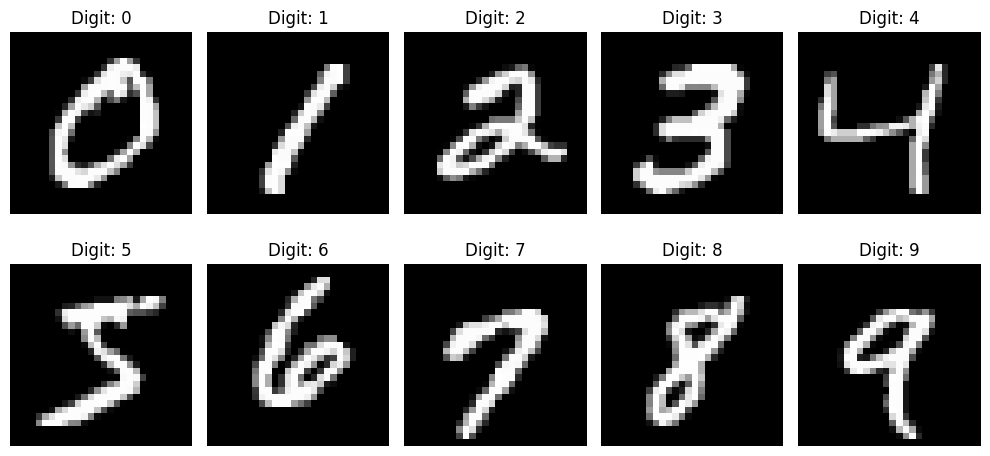

In [4]:
import matplotlib.pyplot as plt
# Step 2: Visualize digits 0 to 9
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Loop through the digits 0 to 9
for i in range(10):
    # Select the first image corresponding to each digit (use y == i to filter)
    ax = axes[i // 5, i % 5]
    ax.imshow(X[y == i].iloc[0].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Digit: {i}")
    ax.axis('off')  # Hide axes for better clarity

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Saving the Model

In [7]:
# After training your model, save it like this:
model.booster_.save_model('Digit_classification.txt')  # LightGBM native format
# OR using joblib:
from joblib import dump
dump(model, 'Digit_classification.joblib')  # Alternative method

['Digit_classification.joblib']

# Testing-1

In [ ]:
from tkinter import *
from PIL import Image, ImageDraw
import PIL.ImageOps 

class DigitPredictorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Prediction")
        
        # Create a canvas for drawing
        self.canvas = Canvas(root, width=280, height=280, bg='white')
        self.canvas.grid(row=0, column=0, padx=10, pady=10)

        # Button to clear the canvas
        self.clear_button = Button(root, text="Clear", width=20, command=self.clear_canvas)
        self.clear_button.grid(row=1, column=0, pady=5)

        # Button to predict the drawn digit
        self.predict_button = Button(root, text="Predict", width=20, command=self.predict_digit)
        self.predict_button.grid(row=2, column=0, pady=5)
        
        # Label to display the prediction result
        self.result_label = Label(root, text="Predicted Digit: ", font=("Helvetica", 16))
        self.result_label.grid(row=3, column=0, pady=10)

        # Initialize the drawing
        self.image = Image.new('L', (280, 280), color=(255))
        self.draw = ImageDraw.Draw(self.image)
        self.old_x = None
        self.old_y = None
        self.marker_size = 15

        # Bind mouse events for drawing
        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.bind("<ButtonRelease-1>", self.reset)

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new('L', (280, 280), color=(255))
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(text="Predicted Digit: ")

    def paint(self, event):
        x, y = event.x, event.y
        if self.old_x and self.old_y:
            self.canvas.create_line((self.old_x, self.old_y, x, y), width=self.marker_size, fill='black', capstyle=ROUND, smooth=TRUE)
            self.draw.line([self.old_x, self.old_y, x, y], fill=0, width=self.marker_size)
        self.old_x = x
        self.old_y = y

    def reset(self, event):
        self.old_x = None
        self.old_y = None

    def predict_digit(self):
        # Convert the image to grayscale (already in grayscale)
        img_resized = self.image.resize((28, 28))  # Resize to 28x28
        img_inverted = PIL.ImageOps.invert(img_resized)  # Invert the image to match MNIST style

        # Convert to numpy array and normalize
        img_array = np.array(img_inverted) / 255.0  # Normalize to 0-1
        img_array = img_array.reshape(1, -1)  # Flatten to 1D array for the model

        # Predict using the logistic regression model
        prediction = model.predict(img_array)
        self.result_label.config(text=f"Predicted Digit: {prediction[0]}")

# Create the main Tkinter window
root = Tk()
app = DigitPredictorApp(root)
root.mainloop()

# Testing-2

In [8]:
from tkinter import *
from PIL import Image, ImageDraw
import PIL.ImageOps 
import numpy as np
import lightgbm as lgb
from joblib import load

class DigitPredictorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Prediction")
        
        # Load the trained model
        try:
            # Try loading the joblib version first
            self.model = load("E:/B Tech/Mini Project/Digit/Digit_classification.joblib")
        except:
            # Fall back to LightGBM native format
            self.model = lgb.LGBMClassifier()
            self.model._Booster = lgb.Booster(model_file='Digit_classification.txt')
        
        # Create a canvas for drawing
        self.canvas = Canvas(root, width=280, height=280, bg='white')
        self.canvas.grid(row=0, column=0, padx=10, pady=10)

        # Button to clear the canvas
        self.clear_button = Button(root, text="Clear", width=20, command=self.clear_canvas)
        self.clear_button.grid(row=1, column=0, pady=5)

        # Button to predict the drawn digit
        self.predict_button = Button(root, text="Predict", width=20, command=self.predict_digit)
        self.predict_button.grid(row=2, column=0, pady=5)
        
        # Label to display the prediction result
        self.result_label = Label(root, text="Predicted Digit: ", font=("Helvetica", 16))
        self.result_label.grid(row=3, column=0, pady=10)

        # Initialize the drawing
        self.image = Image.new('L', (280, 280), color=(255))
        self.draw = ImageDraw.Draw(self.image)
        self.old_x = None
        self.old_y = None
        self.marker_size = 15

        # Bind mouse events for drawing
        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.bind("<ButtonRelease-1>", self.reset)

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new('L', (280, 280), color=(255))
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(text="Predicted Digit: ")

    def paint(self, event):
        x, y = event.x, event.y
        if self.old_x and self.old_y:
            self.canvas.create_line((self.old_x, self.old_y, x, y), width=self.marker_size, fill='black', capstyle=ROUND, smooth=TRUE)
            self.draw.line([self.old_x, self.old_y, x, y], fill=0, width=self.marker_size)
        self.old_x = x
        self.old_y = y

    def reset(self, event):
        self.old_x = None
        self.old_y = None

    def predict_digit(self):
        # Convert the image to MNIST format
        img_resized = self.image.resize((28, 28))  # Resize to 28x28
        img_inverted = PIL.ImageOps.invert(img_resized)  # Invert colors
        
        # Convert to numpy array and normalize (same as training)
        img_array = np.array(img_inverted) / 255.0
        img_array = img_array.reshape(1, -1)  # Flatten to 1x784
        
        # Make prediction
        prediction = self.model.predict(img_array)
        self.result_label.config(text=f"Predicted Digit: {prediction[0]}")

# Create and run the application
root = Tk()
app = DigitPredictorApp(root)
root.mainloop()

C:\Users\munib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\munib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\munib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\munib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\munib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\d

# Streamlit App

In [17]:
%%writefile Digit.py
import streamlit as st
from streamlit_drawable_canvas import st_canvas
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import lightgbm as lgb
from joblib import load

# Load the model (do this once when the app starts)
@st.cache_resource
def load_model():
    try:
        # Try loading the joblib version first
        return load("E:/B Tech/Mini Project/Digit/Digit_classification.joblib")
    except:
        # Fall back to LightGBM native format
        model = lgb.LGBMClassifier()
        model._Booster = lgb.Booster(model_file='E:/B Tech/Mini Project/Digit/Digit_classification.txt')
        return model

model = load_model()

# Set up the app
st.title("🧠 Digit Recognition App")
st.write("✏️ Draw a digit (0-9) in the box below and click **'Predict'**")

# Create a canvas component
canvas_result = st_canvas(
    fill_color="white",
    stroke_width=15,
    stroke_color="black",
    background_color="white",
    height=280,
    width=280,
    drawing_mode="freedraw",
    key="canvas",
)

# Add buttons
col1, col2 = st.columns(2)
with col1:
    predict_btn = st.button("Predict")

# Prediction function
def predict_digit(image):
    # Resize to 28x28 and invert colors
    img_resized = image.resize((28, 28))
    img_inverted = ImageOps.invert(img_resized)

    # Normalize and flatten
    img_array = np.array(img_inverted) / 255.0
    img_array = img_array.reshape(1, -1)

    # Predict
    prediction = model.predict(img_array)
    return prediction[0]


# Handle predict button
if predict_btn:
    if canvas_result.image_data is not None:
        # Convert canvas to PIL Image
        img = Image.fromarray((canvas_result.image_data[:, :, :3]).astype('uint8'))  # Use only RGB
        img = img.convert("L")  # Convert to grayscale

        # Predict digit
        digit = predict_digit(img)
        st.success(f"✅ Predicted Digit: **{digit}**")
    else:
        st.warning("⚠️ Please draw a digit before clicking Predict.")


Overwriting Digit.py
